### Primero se importan las bibliotecas necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Primero se cargan los datos necesarios

In [15]:
train_data = pd.read_csv("datos/train.csv")
validation_data = pd.read_csv("datos/validation.csv")
train_data.head()


,rating,review_title,text,user_id,timestamp,item_title,item_id
0,5.0,One of my favorites !,Great game in the series !,149157,2017-11-13 10:53:02.745,Medal of Honor - PC,4946
1,5.0,Five Stars,Thanks.,773830,2018-02-21 00:28:38.152,Skylanders Imaginators - Crash Bandicoot Editi...,1451
2,5.0,Almost perfect...,Likes:<br />Smaller and lighter than the origi...,684350,2021-05-30 23:57:05.474,Retro Fighters StrikerDC Dreamcast Controller ...,39371
3,5.0,Five Stars,like it,524397,2017-04-12 22:33:32.000,Skylanders SuperChargers: Vehicle Burn Cycle C...,1440
4,5.0,Great game,A huge hit at my household. Nice job!,310221,2019-04-03 20:32:43.047,Yoshi's Crafted World - Nintendo Switch [Digit...,2869


In [12]:
vg_data = pd.read_csv("datos/videogames_metadata.csv")
vg_data.head()

,title,average_rating,rating_number,features,description,price,store,categories,item_id,image
0,Dash 8-300 Professional Add-On,5.0,1,"""Features Dash 8-300 and 8-Q300 (Q rollout liv...",The Dash 8-300 Professional Add-On lets you pi...,NaN,Aerosoft,"PC, Games",118568,https://m.media-amazon.com/images/I/21DVWE41A0...
1,Phantasmagoria: A Puzzle of Flesh,4.1,18,Windows 95,NaN,NaN,Sierra,"PC, Games",35295,https://m.media-amazon.com/images/I/51pqAznTA9...
2,NBA 2K17 - Early Tip Off Edition - PlayStation 4,4.3,223,The #1 rated NBA video game simulation series ...,Following the record-breaking launch of NBA 2K...,58.00,2K,"PlayStation 4, Games",2884,https://m.media-amazon.com/images/I/51wlIPcf0g...
3,Nintendo Selects: The Legend of Zelda Ocarina ...,4.9,22,Authentic Nintendo Selects: The Legend of Zeld...,NaN,37.42,Amazon Renewed,"Legacy Systems, Nintendo Systems, Nintendo 3D...",106166,https://m.media-amazon.com/images/I/51raO0wAe8...
4,Thrustmaster Elite Fitness Pack for Nintendo Wii,3.0,3,Includes (9) Total Accessories Pedometer Wii...,The Thrustmaster Motion Plus Elite Fitness Pac...,NaN,THRUSTMASTER,"Legacy Systems, Nintendo Systems, Wii, Access...",93217,https://m.media-amazon.com/images/I/31spO9JKlu...


### Cantidad de datos

In [34]:
# Numero de usuarios únicos en train y validation
cantidad_ratings_train = len(train_data)
numero_usuarios_train = train_data['user_id'].nunique()
cantidad_ratings_validation = len(validation_data)
numero_usuarios_validation = validation_data['user_id'].nunique()
print("Número de ratings en train:", cantidad_ratings_train)
print("Número de usuarios únicos en train:", numero_usuarios_train)
print("Número de ratings en validation:", cantidad_ratings_validation)
print("Número de usuarios únicos en validation:", numero_usuarios_validation)

# Se verifica que sean los mismos usuarios
print(f"Son los mismos usuarios?: {train_data['user_id'].unique().sort() == validation_data['user_id'].unique().sort()}")


Número de ratings en train: 68584
Número de usuarios únicos en train: 5814
Número de ratings en validation: 22861
Número de usuarios únicos en validation: 5814
Son los mismos usuarios?: True


In [32]:
# Numero de items en train
numero_items_train = train_data['item_id'].nunique()
print("Número de items en train:", numero_items_train)

# Numero de items en validation
numero_items_validation = validation_data['item_id'].nunique()
print("Número de items en validation:", numero_items_validation)

# Numero de items en total
numero_items = vg_data['item_id'].nunique()
print("Número de items totales:", numero_items)

elementos_validacion = validation_data['item_id'].unique().tolist()
elememtos_train = train_data['item_id'].unique().tolist()
contador = 0
for elemento in elementos_validacion:
    if elemento in elememtos_train:
        contador += 1
print("Número de items en validación que están en train:", contador, str(round((contador/len(elememtos_train))*100,1)) + "%")
        


Número de items en train: 16846
Número de items en validation: 9246
Número de items totales: 81255
Número de items en validación que están en train: 6849 40.7%


### Promedios de ratings

In [49]:
# Promedio de cantidad de ratings por usuario en train
cantidad_ratings_usuario_train = train_data.groupby('user_id').size()
promedio_ratings_usuario = round(cantidad_ratings_usuario_train.mean(), 1)
std_ratings_usuario = round(cantidad_ratings_usuario_train.std(), 1)
print("Promedio de ratings por usuario en train:", promedio_ratings_usuario)
print("Desviación estándar de ratings por usuario en train:", std_ratings_usuario)

# Promedio de cantidad de ratings por usuario en validation
cantidad_ratings_usuario_validation = validation_data.groupby('user_id').size()
promedio_ratings_usuario_validation = round(cantidad_ratings_usuario_validation.mean(), 1)
std_ratings_usuario_validation = round(cantidad_ratings_usuario_validation.std(), 1)
print("Promedio de ratings por usuario en validation:", promedio_ratings_usuario_validation)
print("Desviación estándar de ratings por usuario en validation:", std_ratings_usuario_validation)

Promedio de ratings por usuario en train: 11.8
Desviación estándar de ratings por usuario en train: 2.4
Promedio de ratings por usuario en validation: 3.9
Desviación estándar de ratings por usuario en validation: 0.8


In [50]:
# Promedio de ratings por item en train
cantidad_ratings_item_train = train_data.groupby('item_id').size()
promedio_ratings_item = round(cantidad_ratings_item_train.mean(), 1)
std_ratings_item = round(cantidad_ratings_item_train.std(), 1)
print("Promedio de ratings por item en train:", promedio_ratings_item)
print("Desviación estándar de ratings por item en train:", std_ratings_item)

# Promedio de ratings por item en validation
cantidad_ratings_item_validation = validation_data.groupby('item_id').size()
promedio_ratings_item_validation = round(cantidad_ratings_item_validation.mean(), 1)
std_ratings_item_validation = round(cantidad_ratings_item_validation.std(), 1)
print("Promedio de ratings por item en validation:", promedio_ratings_item_validation)
print("Desviación estándar de ratings por item en validation:", std_ratings_item_validation)

Promedio de ratings por item en train: 4.1
Desviación estándar de ratings por item en train: 8.6
Promedio de ratings por item en validation: 2.5
Desviación estándar de ratings por item en validation: 3.8


In [67]:
# Promedio de todos los ratings en train
promedio_rating_train = round(train_data['rating'].mean(), 2)
std_rating_train = round(train_data['rating'].std(), 2)
print("Promedio de todos los ratings en train:", promedio_rating_train)
print("Desviación estándar de todos los ratings en train:", std_rating_train)

# Promedio de todos los ratings en validation
promedio_rating_validation = round(validation_data['rating'].mean(), 2)
std_rating_validation = round(validation_data['rating'].std(), 2)
print("Promedio de todos los ratings en validation:", promedio_rating_validation)
print("Desviación estándar de todos los ratings en validation:", std_rating_validation)

# Promedio de todos los ratings en train, por item
promedio_rating_item_train = round(train_data.groupby('item_id')['rating'].mean().mean(), 2)
std_rating_item_train = round(train_data.groupby('item_id')['rating'].mean().std(), 2)
print("Promedio de todos los ratings en train, por item:", promedio_rating_item_train)
print("Desviación estándar de todos los ratings en train, por item:", std_rating_item_train)

# Promedio de todos los ratings en validation, por item
promedio_rating_item_validation = round(validation_data.groupby('item_id')['rating'].mean().mean(), 2)
std_rating_item_validation = round(validation_data.groupby('item_id')['rating'].mean().std(), 2)
print("Promedio de todos los ratings en validation, por item:", promedio_rating_item_validation)
print("Desviación estándar de todos los ratings en validation, por item:", std_rating_item_validation)


Promedio de todos los ratings en train: 4.27
Desviación estándar de todos los ratings en train: 1.16
Promedio de todos los ratings en validation: 4.27
Desviación estándar de todos los ratings en validation: 1.16
Promedio de todos los ratings en train, por item: 4.2
Desviación estándar de todos los ratings en train, por item: 1.01
Promedio de todos los ratings en validation, por item: 4.23
Desviación estándar de todos los ratings en validation, por item: 1.05


### Valores extremos

In [71]:
# Cantidad maxima de ratings por un usuario en train
cantidad_maxima_ratings_usuario_train = cantidad_ratings_usuario_train.max()
print("Cantidad máxima de ratings por un usuario en train:", cantidad_maxima_ratings_usuario_train)

# Cantidad maxima de ratings por un usuario en validation
cantidad_maxima_ratings_usuario_validation = cantidad_ratings_usuario_validation.max()
print("Cantidad máxima de ratings por un usuario en validation:", cantidad_maxima_ratings_usuario_validation)

# Cantidad maxima de ratings a un item en train
cantidad_maxima_ratings_item_train = cantidad_ratings_item_train.max()
print("Cantidad máxima de ratings a un item en train:", cantidad_maxima_ratings_item_train)

# Cantidad maxima de ratings a un item en validation
cantidad_maxima_ratings_item_validation = cantidad_ratings_item_validation.max()
print("Cantidad máxima de ratings a un item en validation:", cantidad_maxima_ratings_item_validation)


Cantidad máxima de ratings por un usuario en train: 18
Cantidad máxima de ratings por un usuario en validation: 6
Cantidad máxima de ratings a un item en train: 248
Cantidad máxima de ratings a un item en validation: 80


### Densidad matrices

In [75]:
# Densidad en train
densidad_train = (cantidad_ratings_train/(numero_usuarios_train * numero_items_train))*100
densidad_validation = (cantidad_ratings_validation/(numero_usuarios_validation * numero_items_validation))*100
print("Densidad en train:", round(densidad_train, 4),"%")
print("Densidad en validation:", round(densidad_validation, 4),"%")

Densidad en train: 0.07 %
Densidad en validation: 0.0425 %


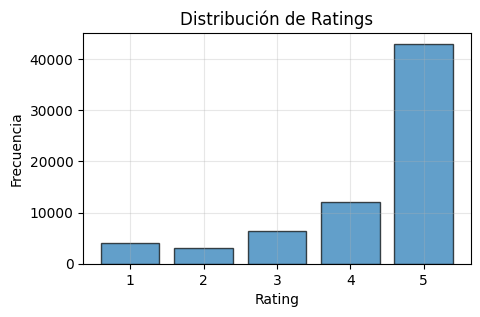

In [6]:
ratings = train_data["rating"]

# Count the frequency of each rating
rating_counts = ratings.value_counts().sort_index()

plt.figure(figsize=(5, 3))
plt.bar(rating_counts.index, rating_counts.values, edgecolor='black', alpha=0.7)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True, alpha=0.3)
plt.show()
